In [1]:
#导入相关包
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
#设置sns样式
sns.set(style='white',context='notebook',palette='muted')
import matplotlib.pyplot as plt
#导入数据
train=pd.read_csv('E:\\3\\train.csv')
test=pd.read_csv('E:\\3\\test.csv')

In [2]:
#分别查看实验数据集和预测数据集数据
print('实验数据大小:',train.shape)
print('预测数据大小:',test.shape)

实验数据大小: (891, 12)
预测数据大小: (418, 11)


In [3]:
#将实验数据和预测数据合并
full=train.append(test,ignore_index=True)
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [4]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

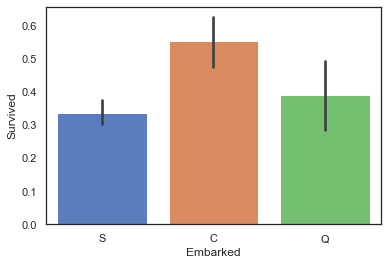

In [5]:
sns.barplot(data=train,x='Embarked',y='Survived')

In [6]:
#计算不同类型embarked的乘客，其生存率为多少
print('Embarked为"S"的乘客，其生存率为%.2f'%full['Survived'][full['Embarked']=='S'].value_counts(normalize=True)[1])
print('Embarked为"C"的乘客，其生存率为%.2f'%full['Survived'][full['Embarked']=='C'].value_counts(normalize=True)[1])
print('Embarked为"Q"的乘客，其生存率为%.2f'%full['Survived'][full['Embarked']=='Q'].value_counts(normalize=True)[1])

Embarked为"S"的乘客，其生存率为0.34
Embarked为"C"的乘客，其生存率为0.55
Embarked为"Q"的乘客，其生存率为0.39


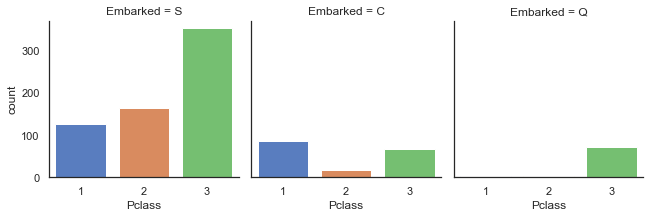

In [7]:
#法国登船乘客生存率较高原因可能与其头等舱乘客比例较高有关
sns.factorplot('Pclass',col='Embarked',data=train,kind='count',size=3)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

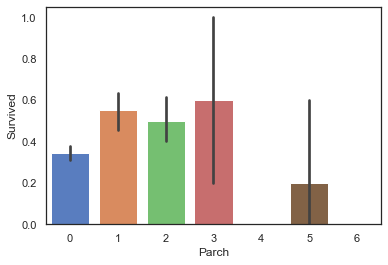

In [8]:
sns.barplot(data=train,x='Parch',y='Survived')

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

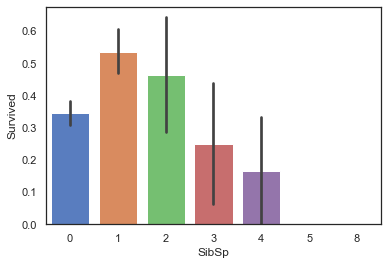

In [9]:
sns.barplot(data=train,x='SibSp',y='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

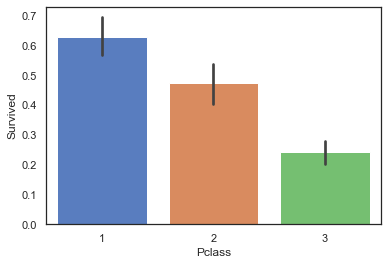

In [10]:
sns.barplot(data=train,x='Pclass',y='Survived')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

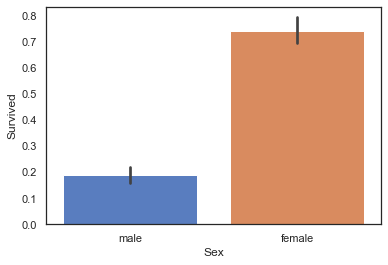

In [11]:
sns.barplot(data=train,x='Sex',y='Survived')

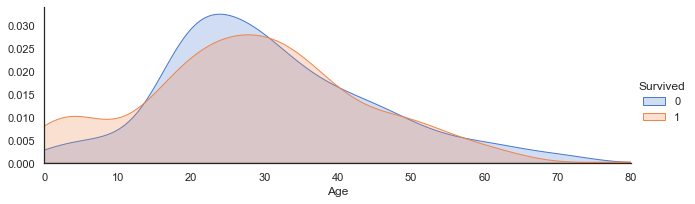

In [12]:
#创建坐标轴
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
#作图，选择图形类型
ageFacet.map(sns.kdeplot,'Age',shade=True)
#其他信息：坐标轴范围、标签等
ageFacet.set(xlim=(0,train['Age'].max()))
ageFacet.add_legend()

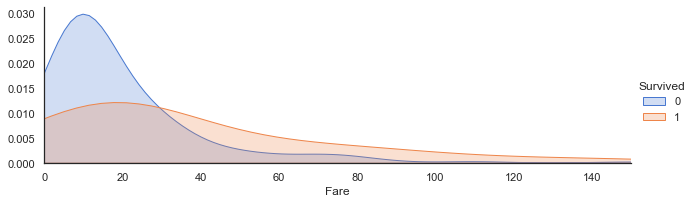

In [13]:
#创建坐标轴
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Fare',shade=True)
ageFacet.set(xlim=(0,150))
ageFacet.add_legend()#查看fare分布

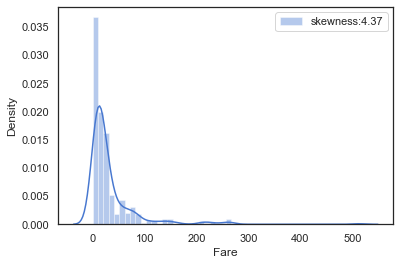

In [14]:
#查看fare分布
farePlot=sns.distplot(full['Fare'][full['Fare'].notnull()],label='skewness:%.2f'%(full['Fare'].skew()))
farePlot.legend(loc='best')

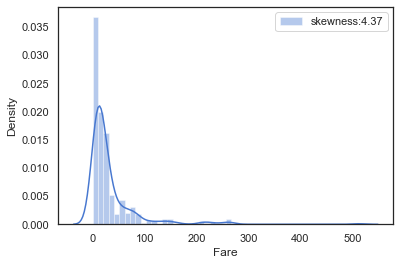

In [15]:
#查看fare分布
farePlot=sns.distplot(full['Fare'][full['Fare'].notnull()],label='skewness:%.2f'%(full['Fare'].skew()))
farePlot.legend(loc='best')

In [16]:
#对Cabin缺失值进行处理，利用U（Unknown）填充缺失值
full['Cabin']=full['Cabin'].fillna('U')
full['Cabin'].head()

0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

In [17]:
#对Embarked缺失值进行处理，查看缺失值情况
full[full['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [18]:
full['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [19]:
full['Embarked']=full['Embarked'].fillna('S')

In [20]:
#查看缺失数据情况，该乘客乘坐3等舱，登船港口为法国，舱位未知
full[full['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S


In [21]:
full['Fare']=full['Fare'].fillna(full[(full['Pclass']==3)&(full['Embarked']=='S')&(full['Cabin']=='U')]['Fare'].mean())

In [22]:
#构造新特征Title
full['Title']=full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
#查看title数据分布
full['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
Capt              1
Jonkheer          1
Mme               1
the Countess      1
Dona              1
Lady              1
Don               1
Sir               1
Name: Title, dtype: int64

In [23]:
#将title信息进行整合
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

full['Title']=full['Title'].map(TitleDict)
full['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='Survived'>

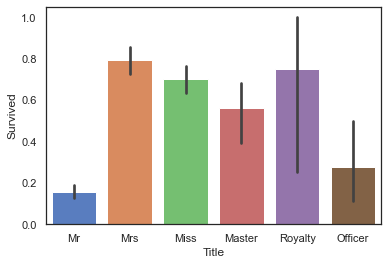

In [24]:
#可视化分析Title与Survived之间关系
sns.barplot(data=full,x='Title',y='Survived')

<AxesSubplot:xlabel='familyNum', ylabel='Survived'>

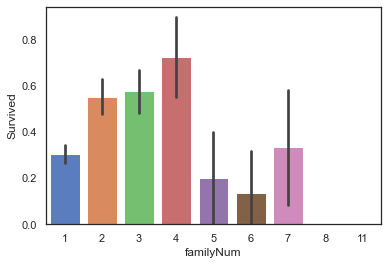

In [25]:
full['familyNum']=full['Parch']+full['SibSp']+1
#查看familyNum与Survived
sns.barplot(data=full,x='familyNum',y='Survived')

In [26]:
#我们按照家庭成员人数多少，将家庭规模分为“小、中、大”三类：
def familysize(familyNum):
    if familyNum==1:
        return 0
    elif (familyNum>=2)&(familyNum<=4):
        return 1
    else:
        return 2

full['familySize']=full['familyNum'].map(familysize)
full['familySize'].value_counts()

0    790
1    437
2     82
Name: familySize, dtype: int64

<AxesSubplot:xlabel='familySize', ylabel='Survived'>

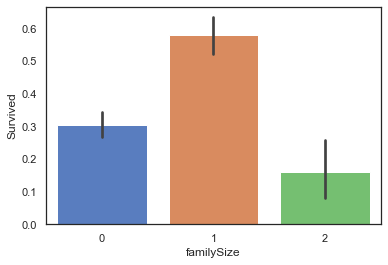

In [27]:
#查看familySize与Survived
sns.barplot(data=full,x='familySize',y='Survived')

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

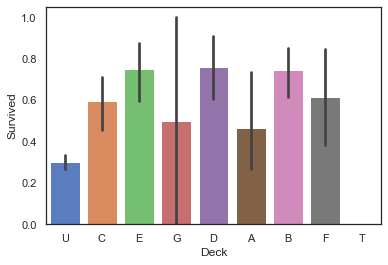

In [28]:
#提取Cabin字段首字母
full['Deck']=full['Cabin'].map(lambda x:x[0])
#查看不同Deck类型乘客的生存率
sns.barplot(data=full,x='Deck',y='Survived')

In [29]:
#提取各票号的乘客数量
TickCountDict={}
TickCountDict=full['Ticket'].value_counts()
TickCountDict.head()


CA. 2343    11
1601         8
CA 2144      8
347077       7
PC 17608     7
Name: Ticket, dtype: int64

In [30]:
#将同票号乘客数量数据并入数据集中
full['TickCot']=full['Ticket'].map(TickCountDict)
full['TickCot'].head()

0    1
1    2
2    1
3    2
4    1
Name: TickCot, dtype: int64

<AxesSubplot:xlabel='TickCot', ylabel='Survived'>

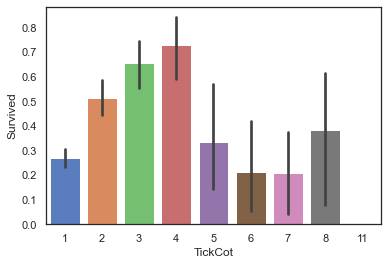

In [31]:
#查看TickCot与Survived之间关系
sns.barplot(data=full,x='TickCot',y='Survived')

<AxesSubplot:xlabel='TickGroup', ylabel='Survived'>

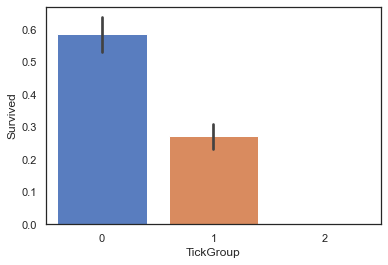

In [32]:
#按照TickCot大小，将TickGroup分为三类。
def TickCountGroup(num):
    if (num>=2)&(num<=4):
        return 0
    elif (num==1)|((num>=5)&(num<=8)):
        return 1
    else :
        return 2
#得到各位乘客TickGroup的类别
full['TickGroup']=full['TickCot'].map(TickCountGroup)
#查看TickGroup与Survived之间关系
sns.barplot(data=full,x='TickGroup',y='Survived')

In [33]:
#查看缺失值情况
full[full['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,familySize,Deck,TickCot,TickGroup
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,U,Q,Mr,1,0,U,1,1
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,U,S,Mr,1,0,U,1,1
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,U,C,Mrs,1,0,U,1,1
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,U,C,Mr,1,0,U,1,1
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,U,Q,Miss,1,0,U,1,1


In [34]:
#筛选数据集
AgePre=full[['Age','Parch','Pclass','SibSp','Title','familyNum','TickCot']]
#进行one-hot编码
AgePre=pd.get_dummies(AgePre)
ParAge=pd.get_dummies(AgePre['Parch'],prefix='Parch')
SibAge=pd.get_dummies(AgePre['SibSp'],prefix='SibSp')
PclAge=pd.get_dummies(AgePre['Pclass'],prefix='Pclass')
#查看变量间相关性
AgeCorrDf=pd.DataFrame()
AgeCorrDf=AgePre.corr()
AgeCorrDf['Age'].sort_values()

Pclass          -0.408106
Title_Master    -0.385380
Title_Miss      -0.282977
SibSp           -0.243699
familyNum       -0.240229
TickCot         -0.185284
Parch           -0.150917
Title_Royalty    0.057337
Title_Officer    0.166771
Title_Mr         0.183965
Title_Mrs        0.215091
Age              1.000000
Name: Age, dtype: float64

In [35]:
#拼接数据
AgePre=pd.concat([AgePre,ParAge,SibAge,PclAge],axis=1)
AgePre.head()

,Age,Parch,Pclass,SibSp,familyNum,TickCot,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_1,Pclass_2,Pclass_3
0,22.0,0,3,1,2,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,38.0,0,1,1,2,2,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,26.0,0,3,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,0,1,1,2,2,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,35.0,0,3,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [36]:
#拆分实验集和预测集
AgeKnown=AgePre[AgePre['Age'].notnull()]
AgeUnKnown=AgePre[AgePre['Age'].isnull()]

#生成实验数据的特征和标签
AgeKnown_X=AgeKnown.drop(['Age'],axis=1)
AgeKnown_y=AgeKnown['Age']
#生成预测数据的特征
AgeUnKnown_X=AgeUnKnown.drop(['Age'],axis=1)

#利用随机森林构建模型
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(AgeKnown_X,AgeKnown_y)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [37]:
#模型得分
rfr.score(AgeKnown_X,AgeKnown_y)

0.5870974647782097

In [38]:
#预测年龄
AgeUnKnown_y=rfr.predict(AgeUnKnown_X)
#填充预测数据
full.loc[full['Age'].isnull(),['Age']]=AgeUnKnown_y
full.info()  #此时已无缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  familyNum    1309 non-null   int64  
 14  familySize   1309 non-null   int64  
 15  Deck         1309 non-null   object 
 16  TickCot      1309 non-null   int64  
 17  TickGroup    1309 non-null   int64  
dtypes: float64(3), int64(8), object(7)
memory usage:

In [39]:
#提取乘客的姓氏及相应的乘客数
full['Surname']=full['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict={}
SurNameDict=full['Surname'].value_counts()
full['SurnameNum']=full['Surname'].map(SurNameDict)

#将数据分为两组
MaleDf=full[(full['Sex']=='male')&(full['Age']>12)&(full['familyNum']>=2)]
FemChildDf=full[((full['Sex']=='female')|(full['Age']<=12))&(full['familyNum']>=2)]

In [40]:
#分析男性同组效应
MSurNamDf=MaleDf['Survived'].groupby(MaleDf['Surname']).mean()
MSurNamDf.head()
MSurNamDf.value_counts()

0.0    89
1.0    19
0.5     3
Name: Survived, dtype: int64

In [41]:
#分析男性同组效应
MSurNamDf=MaleDf['Survived'].groupby(MaleDf['Surname']).mean()
MSurNamDf.head()
MSurNamDf.value_counts()

0.0    89
1.0    19
0.5     3
Name: Survived, dtype: int64

In [42]:
#分析女性及儿童同组效应
FCSurNamDf=FemChildDf['Survived'].groupby(FemChildDf['Surname']).mean()
FCSurNamDf.head()
FCSurNamDf.value_counts()

1.000000    115
0.000000     27
0.750000      2
0.333333      1
0.142857      1
Name: Survived, dtype: int64

In [43]:
#获得生存率为0的姓氏
FCSurNamDict={}
FCSurNamDict=FCSurNamDf[FCSurNamDf.values==0].index
FCSurNamDict

Index(['Ahlin', 'Arnold-Franchi', 'Barbara', 'Boulos', 'Bourke', 'Caram',
       'Danbom', 'Ford', 'Goodwin', 'Ilmakangas', 'Johnston', 'Jussila',
       'Lahtinen', 'Lefebre', 'Lobb', 'Palsson', 'Panula', 'Rice', 'Robins',
       'Rosblom', 'Sage', 'Skoog', 'Strom', 'Turpin', 'Van Impe',
       'Vander Planke', 'Zabour'],
      dtype='object', name='Surname')

In [44]:
#对数据集中这些姓氏的男性数据进行修正：1、性别改为女；2、年龄改为5。
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Age']=5
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Sex']='female'

#对数据集中这些姓氏的女性及儿童的数据进行修正：1、性别改为男；2、年龄改为60。
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Age']=60
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Sex']='male'

NameError: name 'MSurNamDict' is not defined

In [45]:
#人工筛选
fullSel=full.drop(['Cabin','Name','Ticket','PassengerId','Surname','SurnameNum'],axis=1)
#查看各特征与标签的相关性
corrDf=pd.DataFrame()
corrDf=fullSel.corr()
corrDf['Survived'].sort_values(ascending=True)

Pclass       -0.338481
TickGroup    -0.319278
Age          -0.059142
SibSp        -0.035322
familyNum     0.016639
TickCot       0.064962
Parch         0.081629
familySize    0.108631
Fare          0.257307
Survived      1.000000
Name: Survived, dtype: float64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'Survived'),
  Text(1.5, 0, 'Age'),
  Text(2.5, 0, 'Fare'),
  Text(3.5, 0, 'Parch'),
  Text(4.5, 0, 'Pclass'),
  Text(5.5, 0, 'SibSp'),
  Text(6.5, 0, 'familyNum'),
  Text(7.5, 0, 'familySize'),
  Text(8.5, 0, 'TickCot'),
  Text(9.5, 0, 'TickGroup')])

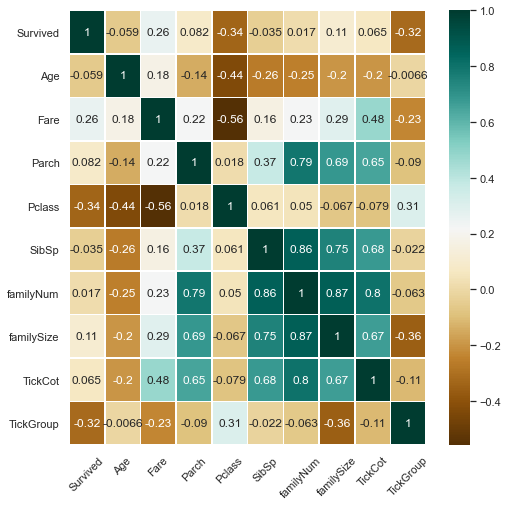

In [46]:
#热力图，查看Survived与其他特征间相关性大小
plt.figure(figsize=(8,8))
sns.heatmap(fullSel[['Survived','Age','Embarked','Fare','Parch','Pclass',
                    'Sex','SibSp','Title','familyNum','familySize','Deck',
                     'TickCot','TickGroup']].corr(),cmap='BrBG',annot=True,
           linewidths=.5)
plt.xticks(rotation=45)

In [47]:
fullSel=fullSel.drop(['familyNum','SibSp','TickCot','Parch'],axis=1)
#one-hot编码
fullSel=pd.get_dummies(fullSel)
PclassDf=pd.get_dummies(full['Pclass'],prefix='Pclass')
TickGroupDf=pd.get_dummies(full['TickGroup'],prefix='TickGroup')
familySizeDf=pd.get_dummies(full['familySize'],prefix='familySize')

fullSel=pd.concat([fullSel,PclassDf,TickGroupDf,familySizeDf],axis=1)

In [48]:
#拆分实验数据与预测数据
experData=fullSel[fullSel['Survived'].notnull()]
preData=fullSel[fullSel['Survived'].isnull()]

experData_X=experData.drop('Survived',axis=1)
experData_y=experData['Survived']
preData_X=preData.drop('Survived',axis=1)

#导入机器学习算法库
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

#设置kfold，交叉采样法拆分数据集
kfold=StratifiedKFold(n_splits=10)

#汇总不同模型算法
classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())

In [49]:
#不同机器学习交叉验证结果汇总
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,experData_X,experData_y,
                                      scoring='accuracy',cv=kfold))

In [50]:
#求出模型得分的均值和标准差
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
#汇总数据
cvResDf=pd.DataFrame({'cv_mean':cv_means,
                     'cv_std':cv_std,
                     'algorithm':['SVC','DecisionTreeCla','RandomForestCla','ExtraTreesCla',
                                  'GradientBoostingCla','KNN','LR','LinearDiscrimiAna']})

cvResDf

,cv_mean,cv_std,algorithm
0,0.675718,0.042975,SVC
1,0.776729,0.058756,DecisionTreeCla
2,0.814856,0.036058,RandomForestCla
3,0.803633,0.041575,ExtraTreesCla
4,0.835056,0.043923,GradientBoostingCla
5,0.728402,0.024929,KNN
6,0.831685,0.037407,LR
7,0.826080,0.033532,LinearDiscrimiAna


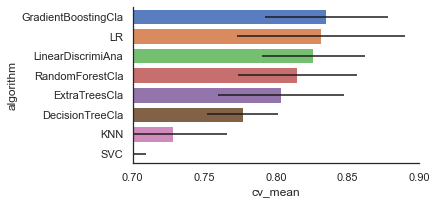

In [51]:
cvResFacet=sns.FacetGrid(cvResDf.sort_values(by='cv_mean',ascending=False),sharex=False,
            sharey=False,aspect=2)
cvResFacet.map(sns.barplot,'cv_mean','algorithm',**{'xerr':cv_std},
               palette='muted')
cvResFacet.set(xlim=(0.7,0.9))
cvResFacet.add_legend()

In [52]:
#GradientBoostingClassifier模型
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
modelgsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, 
                                     scoring="accuracy", verbose = 1)
modelgsGBC.fit(experData_X,experData_y)

#LogisticRegression模型
modelLR=LogisticRegression()
LR_param_grid = {'C' : [1,2,3],
                'penalty':['l1','l2']}
modelgsLR = GridSearchCV(modelLR,param_grid = LR_param_grid, cv=kfold, 
                                     scoring="accuracy", verbose = 1)
modelgsLR.fit(experData_X,experData_y)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [53]:
#modelgsGBC模型
print('modelgsGBC模型得分为：%.3f'%modelgsGBC.best_score_)
#modelgsLR模型
print('modelgsLR模型得分为：%.3f'%modelgsLR.best_score_)

modelgsGBC模型得分为：0.842
modelgsLR模型得分为：0.835


<Figure size 432x288 with 0 Axes>

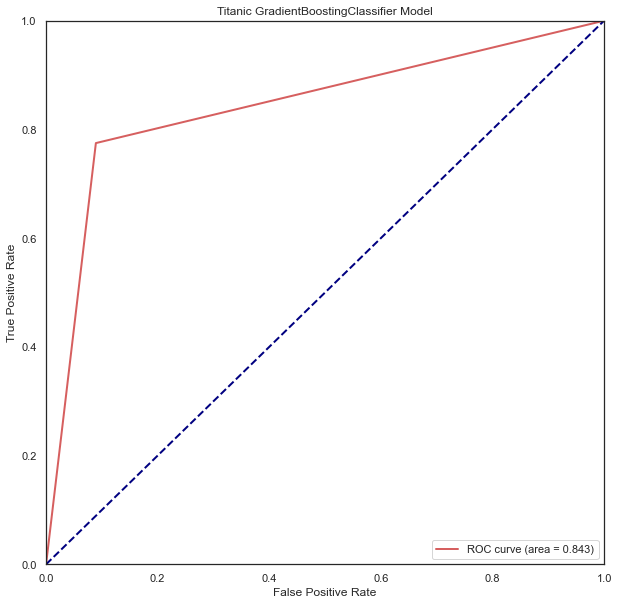

In [54]:
#查看模型ROC曲线
#求出测试数据模型的预测值
modelgsGBCtestpre_y=modelgsGBC.predict(experData_X).astype(int)
#画图
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(experData_y, modelgsGBCtestpre_y) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic GradientBoostingClassifier Model')
plt.legend(loc="lower right")
plt.show()

In [55]:
#混淆矩阵
from sklearn.metrics import confusion_matrix
print('GradientBoostingClassifier模型混淆矩阵为\n',confusion_matrix(experData_y.astype(int).astype(str),modelgsGBCtestpre_y.astype(str)))

GradientBoostingClassifier模型混淆矩阵为
 [[500  49]
 [ 77 265]]


In [56]:
#TitanicGBSmodle
GBCpreData_y=modelgsGBC.predict(preData_X)
GBCpreData_y=GBCpreData_y.astype(int)
#导出预测结果
GBCpreResultDf=pd.DataFrame()
GBCpreResultDf['PassengerId']=full['PassengerId'][full['Survived'].isnull()]
GBCpreResultDf['Survived']=GBCpreData_y
GBCpreResultDf
#将预测结果导出为csv文件
GBCpreResultDf.to_csv('E:\\4\\TitanicGBSmodle.csv',index=False)